In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv

In [3]:
# Load dataframes
path = '../../../predict-future-sales/'

df_train = pd.read_csv(path + 'sales_train.csv')
df_test = pd.read_csv(path + 'test.csv')
df_sub = pd.read_csv(path + 'sample_submission.csv')

In [5]:
df_train.info(), df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


(None,
        date_block_num       shop_id       item_id    item_price  item_cnt_day
 count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
 mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
 std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
 min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
 25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
 50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
 75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
 max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03)

In [6]:
df_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

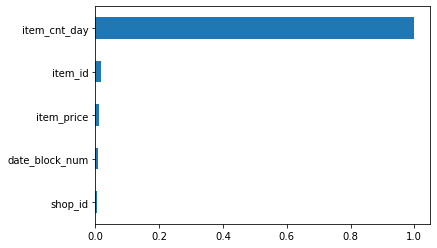

In [8]:
df_train.corr()['item_cnt_day'].abs().sort_values().plot.barh();

In [9]:
# #analyzing the dataset
# advert_report = sv.analyze(df_train)
# #display the report
# advert_report.show_html('Advertising.html')

In [10]:
df_october_train = df_train.loc[df_train['date_block_num'] == 33]

df_october_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2882335,23.10.2015,33,45,13315,649.0,1.0
2882336,05.10.2015,33,45,13880,229.0,1.0
2882337,02.10.2015,33,45,13881,659.0,1.0
2882338,12.10.2015,33,45,13881,659.0,1.0
2882339,04.10.2015,33,45,13923,169.0,1.0


In [11]:
df_october_train.groupby(["shop_id", "item_id"])[["item_cnt_day"]].agg(["min", "max", "mean", "count", "sum"])

item_cnt_day                     
                         min  max mean count  sum
shop_id item_id                                  
2       31               1.0  1.0  1.0     1  1.0
        486              1.0  1.0  1.0     3  3.0
        787              1.0  1.0  1.0     1  1.0
        794              1.0  1.0  1.0     1  1.0
        968              1.0  1.0  1.0     1  1.0
...                      ...  ...  ...   ...  ...
59      22087            1.0  3.0  2.0     3  6.0
        22088            1.0  1.0  1.0     2  2.0
        22091            1.0  1.0  1.0     1  1.0
        22100            1.0  1.0  1.0     1  1.0
        22102            1.0  1.0  1.0     1  1.0

[31531 rows x 5 columns]

In [12]:
df_oct_sum = df_october_train.groupby(["shop_id", "item_id"], as_index=False)[["item_cnt_day"]].sum()

In [14]:
results = pd.merge(left = df_test,         # Left table for the join
                   right = df_oct_sum, # Right table for the join
                   on=["shop_id", "item_id"], # Common keys
                   how='left')          # Type of join, keeping the table in the position specified

results.head()

,ID,shop_id,item_id,item_cnt_day
0,0,5,5037,NaN
1,1,5,5320,NaN
2,2,5,5233,1.0
3,3,5,5232,NaN
4,4,5,5268,NaN


In [15]:
results['item_cnt_day'] = results['item_cnt_day'].fillna(0)

results.describe()

,ID,shop_id,item_id,item_cnt_day
count,214200.000000,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627,0.293413
std,61834.358168,17.561933,6252.644590,5.550976
min,0.000000,2.000000,30.000000,-1.000000
25%,53549.750000,16.000000,5381.500000,0.000000
50%,107099.500000,34.500000,11203.000000,0.000000
75%,160649.250000,47.000000,16071.500000,0.000000
max,214199.000000,59.000000,22167.000000,2253.000000


In [16]:
results.item_cnt_day = results.item_cnt_day.clip(lower=0, upper=20)
results.head()

,ID,shop_id,item_id,item_cnt_day
0,0,5,5037,0.0
1,1,5,5320,0.0
2,2,5,5233,1.0
3,3,5,5232,0.0
4,4,5,5268,0.0


In [17]:
df_sub["item_cnt_month"] = results["item_cnt_day"]
df_sub.head()

,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0


In [18]:
df_sub.to_csv("oct2015.csv")

!head oct2015.csv

,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0
5,5,1.0
6,6,2.0
7,7,0.0
8,8,0.0
